In [2]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import scipy.stats as st
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob
import re

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor 
from DR_analysis_utils import compute_smoothed_response_rate, compute_block_modulation

%matplotlib notebook

In [3]:
main_path = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
]

In [4]:
sessions={}

for mi,mm in enumerate(main_path):
    sessions[mi]=Session(path=mm)
    sessions[mi].assign_unit_areas()
    sessions[mi]=compute_smoothed_response_rate(sessions[mi])
    

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

In [68]:
sessions[0].good_units.query('area.str.contains("VISp")')

,quality,cluster_id,probe,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,...,recovery_slope,amplitude,spread,velocity_above,velocity_below,area,AP_coord,DV_coord,ML_coord,area_short
id,,,,,,,,,,,,,,,,,,,,,
2208151120393,good,393,B,24.629690,0.99,0.005012,0.009744,854.137527,1.647915e-03,5.061424,...,-0.031189,62.567700,20.0,NaN,0.686767,VISpm6b,324.0,49.0,153.0,VISpm
2208151120395,good,395,B,5.752437,0.98,0.007449,0.000525,141.184539,1.302305e-02,6.875399,...,-0.047664,214.133790,40.0,0.206030,NaN,VISpm6a,324.0,48.0,154.0,VISpm
2208151120401,good,401,B,8.358373,0.99,0.070567,0.031435,58.713905,2.995733e-02,4.063818,...,-0.034794,73.353345,60.0,1.167504,0.000000,VISpm6a,324.0,48.0,154.0,VISpm
2208151120404,good,404,B,11.311972,0.99,0.016053,0.009356,61.287550,3.435626e-03,4.660727,...,-0.129901,107.127540,90.0,0.549414,-0.137353,VISpm6a,327.0,45.0,154.0,VISpm
2208151120405,good,405,B,4.513697,0.98,0.193573,0.040991,45.902195,1.555108e-01,3.574087,...,-0.028770,84.470100,80.0,1.030151,0.274707,VISpm6a,327.0,45.0,154.0,VISpm
2208151120406,good,406,B,0.328153,0.98,0.000000,0.018541,40.820060,3.539752e-02,6.350217,...,-0.114392,205.015590,50.0,1.167504,-0.686767,VISpm6a,327.0,45.0,154.0,VISpm
2208151120407,good,407,B,3.221251,0.99,0.190034,0.020758,65.573478,1.189164e-03,6.001258,...,-0.026522,79.379625,100.0,1.412778,0.274707,VISpm6a,327.0,45.0,154.0,VISpm
2208151120410,good,410,B,3.928413,0.98,0.047916,0.008308,66.299732,2.035540e-02,5.052023,...,-0.126116,140.534160,40.0,0.343384,NaN,VISpm6a,326.0,44.0,156.0,VISpm
2208151120411,good,411,B,16.190429,0.99,0.009403,0.000898,78.421040,3.895733e-03,4.537511,...,-0.102302,88.654995,80.0,0.892797,-0.480737,VISpm6a,326.0,44.0,156.0,VISpm


In [6]:
sessions[0].frames

,vsyncTimes,frameDelay,runningSpeed
0,80.04110,0.020720,0.000000
1,80.05762,0.020720,19.208968
2,80.07423,0.022585,18.777305
3,80.09092,0.022585,18.777305
4,80.10810,0.022345,19.640630
...,...,...,...
216905,3698.19226,0.022550,5.611609
216906,3698.20886,0.022625,7.122426
216907,3698.22558,0.022625,7.985751
216908,3698.24227,0.022405,9.064906


In [41]:
sessions[0].trials.columns

Index(['trialStartFrame', 'trialStimID', 'trialstimRewarded', 'trial_response',
       'trial_rewarded', 'trial_sound_dur', 'trial_vis_stim_dur',
       'vis_go_trials', 'vis_nogo_trials', 'vis_hit_trials',
       'vis_false_alarm_trials', 'vis_miss_trials',
       'vis_correct_reject_trials', 'vis_autoreward_trials', 'aud_go_trials',
       'aud_nogo_trials', 'aud_hit_trials', 'aud_false_alarm_trials',
       'aud_miss_trials', 'aud_correct_reject_trials', 'aud_autoreward_trials',
       'catch_trials', 'catch_resp_trials', 'trialStimStartFrame',
       'stimStartTime', 'stimLatency', 'trial_stim_dur', 'avg_run_speed',
       'vis1_interp', 'sound2_interp', 'sound1_interp', 'vis2_interp',
       'catch_interp', 'cross_modal_dprime', 'intra_modal_dprime'],
      dtype='object')

In [42]:
sessions[0].trials.query('trialStimID == "vis1"')

,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,stimLatency,trial_stim_dur,avg_run_speed,vis1_interp,sound2_interp,sound1_interp,vis2_interp,catch_interp,cross_modal_dprime,intra_modal_dprime
0,0,vis1,vis1,True,True,0.0,0.5,True,False,False,...,0.020720,0.5,18.201756,0.546012,NaN,NaN,NaN,NaN,NaN,NaN
1,674,vis1,vis1,True,True,0.0,0.5,True,False,False,...,0.020720,0.5,19.262925,0.636215,NaN,NaN,NaN,NaN,NaN,NaN
2,1044,vis1,vis1,True,True,0.0,0.5,True,False,False,...,0.022585,0.5,-0.154679,0.721164,NaN,NaN,NaN,NaN,NaN,NaN
3,1438,vis1,vis1,True,True,0.0,0.5,True,False,False,...,0.022585,0.5,0.000000,0.798030,NaN,NaN,NaN,NaN,NaN,NaN
4,1841,vis1,vis1,True,True,0.0,0.5,True,False,False,...,0.022345,0.5,0.000000,0.864853,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,207197,vis1,sound1,False,False,0.0,0.5,True,False,False,...,0.022655,0.5,24.075959,0.297791,0.374039,0.828404,0.175323,0.0,1.478641,1.269052
463,208552,vis1,sound1,True,False,0.0,0.5,True,False,True,...,0.022660,0.5,0.079138,0.303886,0.369641,0.810179,0.178689,0.0,1.391815,1.211362
468,210459,vis1,sound1,True,False,0.0,0.5,True,False,True,...,0.022560,0.5,6.910192,0.301714,0.308316,0.751910,0.171313,0.0,1.199990,1.181143
477,214823,vis1,sound1,False,False,0.0,0.5,True,False,False,...,0.022480,0.5,20.075889,0.265354,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# make all-session spike arrays - bin by frame

# start with one neuron
unit_id=2208151120401

frame_times=sessions[0].frames['vsyncTimes'].values
spike_times=sessions[0].spike_times[unit_id]

spikes_binned, bin_edges = np.histogram(spike_times,bins=frame_times)

bin_centers=(bin_edges[:-1]+bin_edges[1:])/2


In [47]:
#make stimulus array

sel_stim='vis'

stim_array = np.zeros(len(bin_centers),dtype=int)

sel_trials = sessions[0].trials.query('trialStimID.str.contains(@sel_stim)')

for tt,trial in sel_trials.iterrows():
    stim_dur=int(trial['trial_stim_dur']*60)
    stim_start_frame=trial['trialStimStartFrame']
    stim_end_frame=trial['trialStimStartFrame']+stim_dur
    stim_array[stim_start_frame:stim_end_frame]=1

<IPython.core.display.Javascript object>


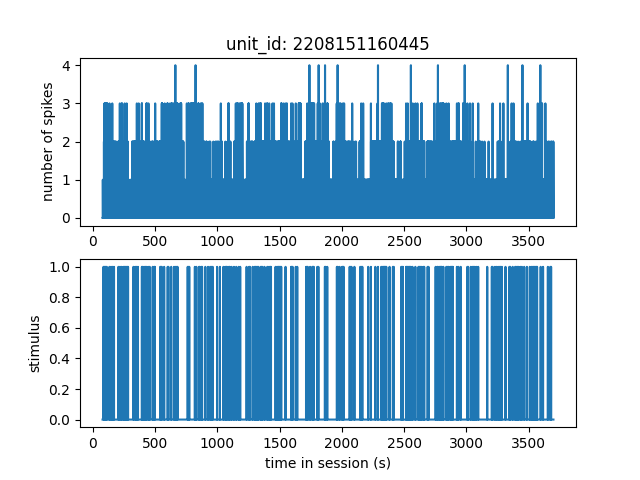

Text(0.5, 0, 'time in session (s)')

In [48]:
fig,ax=plt.subplots(2,1)
ax[0].plot(bin_centers,spikes_binned)
ax[0].set_ylabel('number of spikes')
ax[0].set_title('unit_id: '+str(unit_id))
# ax[1].plot(bin_centers,sessions[0].frames['runningSpeed'].values[1:])
# ax[1].set_ylabel('running speed (cm/sec)')
# ax[1].set_xlabel('time in session (s)')
ax[1].plot(bin_centers,stim_array)
ax[1].set_ylabel('stimulus')
ax[1].set_xlabel('time in session (s)')

In [10]:
bin_centers.shape

(216909,)

In [11]:
frame_times.shape

(216910,)

In [49]:
running = sessions[0].frames['runningSpeed'].values[1:]

dt_frames = np.nanmedian(np.diff(frame_times)) # time bin size
refresh_rate = 1/dt_frames # refresh rate of the monitor
num_time_bins = running.size # number of time bins in stimulus
num_spikes = spike_times.size # number of spikes

## Pillow lab GLM code

--------------------------
Loaded data: unit 2208151160445
Number of stim frames: 216909 (3618.0 minutes)
Time bin size: 16.7 ms
Number of spikes: 40287 (mean rate=11.1 Hz)


<IPython.core.display.Javascript object>


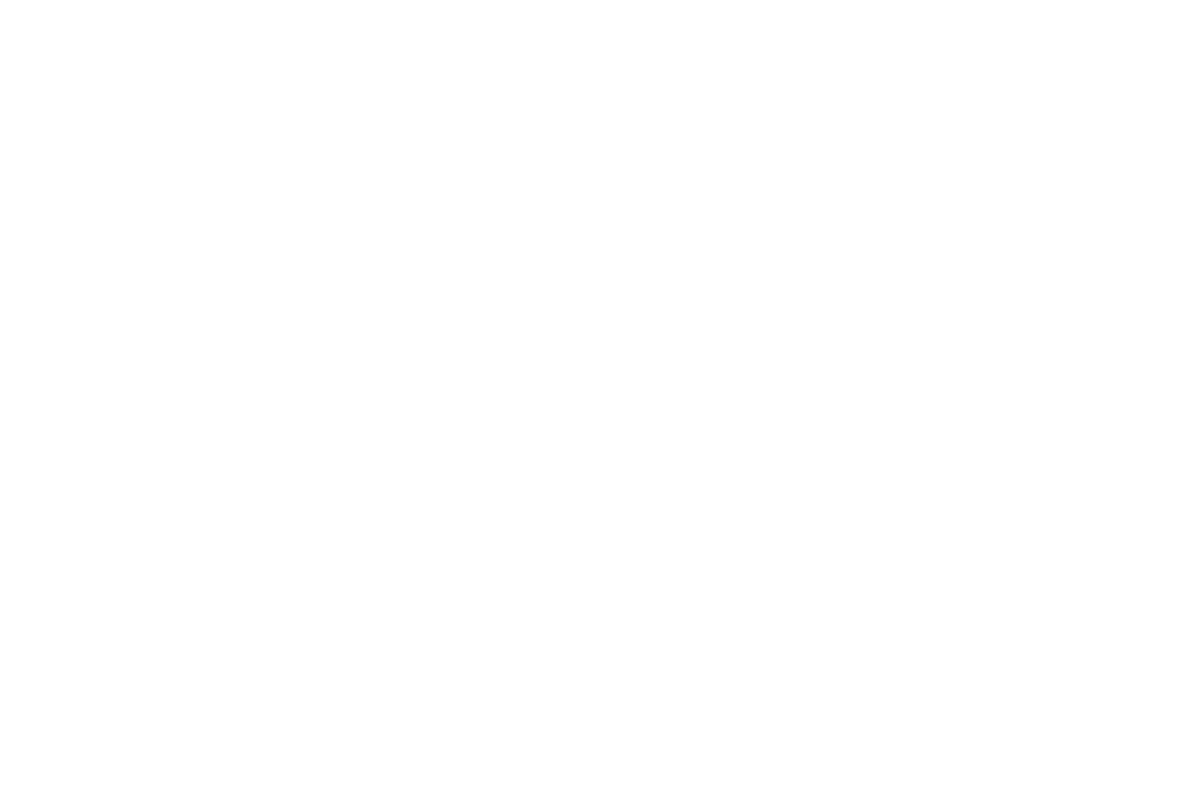

In [51]:

print('--------------------------')
print(f'Loaded data: unit {unit_id}')
print(f'Number of stim frames: {num_time_bins} ({num_time_bins*dt_frames:.1f} minutes)')
print(f'Time bin size: {dt_frames*1000:.1f} ms')
print(f'Number of spikes: {num_spikes} (mean rate={num_spikes/num_time_bins*refresh_rate:.1f} Hz)')

# Let's visualize some of the raw data
fig, (ax1,ax2) = plt.subplots(2)
fig.set_size_inches(12,8)
iiplot = np.arange(500,1000)
# ttplot = iiplot*dt_frames
ttplot=bin_centers[iiplot]
ax1.plot(ttplot, stim_array[iiplot])
# ax1.set_title('raw stimulus (full field flicker)')
ax1.set_ylabel('running speed')

spike_times_plot = spike_times[(spike_times>=ttplot[0]) & (spike_times<ttplot[-1])]
ax2.plot(spike_times_plot, [1]*spike_times_plot.size, 'ko')
ax2.set_xlim([ttplot[0], ttplot[-1]])
ax2.set_xlabel('time (s)')
ax2.set_title('spike times')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


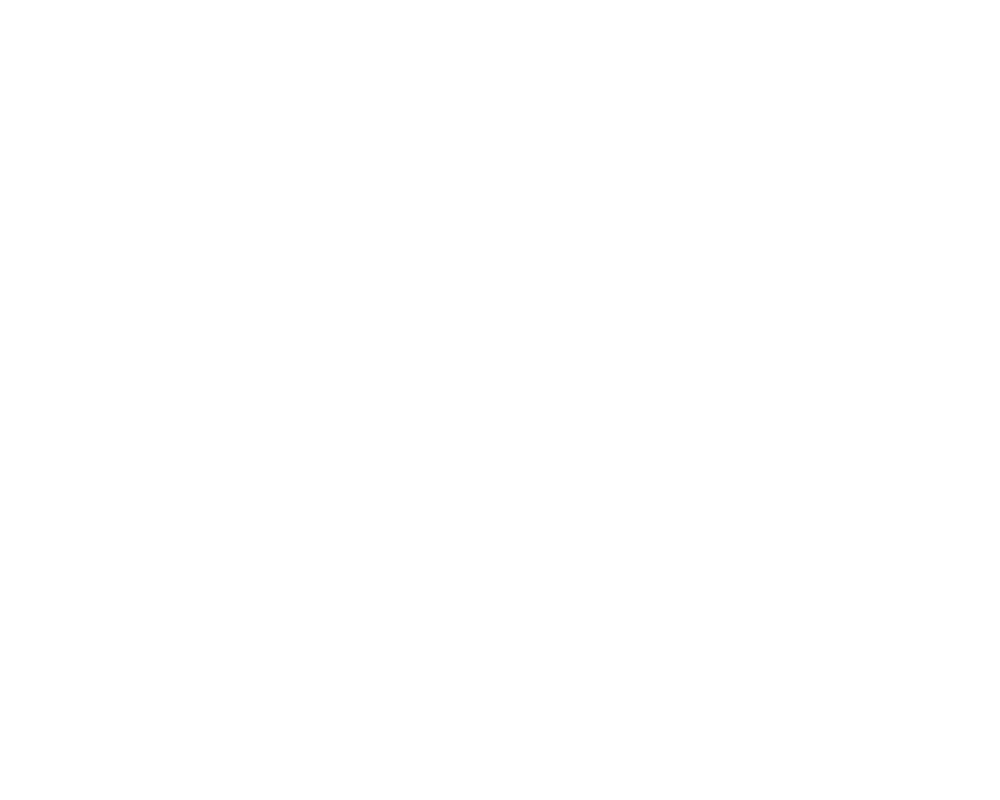

In [53]:
# Set the number of time bins (frames) of stimulus to use for predicting spikes
ntfilt = 25     # Try varying this, to see how performance changes!



### With no for loop
from scipy.linalg import hankel

# padded_running = np.hstack((np.zeros(ntfilt-1), running))   # pad early bins of stimulus with zero
# design_mat = hankel(padded_running[:-ntfilt+1], running[-ntfilt:])

padded_stim = np.hstack((np.zeros(ntfilt-1), stim_array))   # pad early bins of stimulus with zero
design_mat = hankel(padded_stim[:-ntfilt+1], stim_array[-ntfilt:])

### Updated design matrix
design_mat_offset = np.hstack((np.ones((num_time_bins,1)), design_mat))

# (You can check for you like that this gives the same matrix as the one created above!)

plt.clf()
plt.figure(figsize=[10,8])
plt.imshow(design_mat[:550], aspect='auto', interpolation='nearest')
plt.xlabel('lags before spike time')
plt.ylabel('time bin of response')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


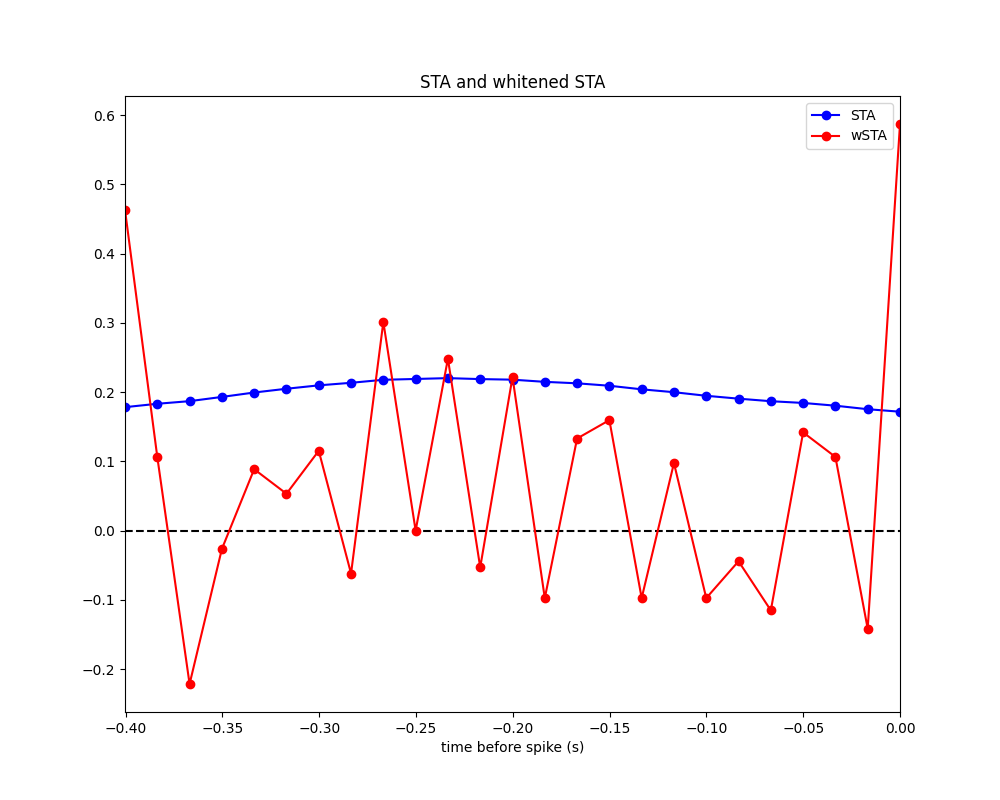

In [54]:
### ===== 4b. whitened STA (ML fit to filter for linear-Gaussian GLM) ======

# If the stimuli are non-white, then the STA is generally a biased
# estimator for the linear filter. In this case we may wish to compute the
# "whitened" STA, which is also the maximum-likelihood estimator for the filter of a 
# GLM with "identity" nonlinearity and Gaussian noise (also known as
# least-squares regression).

# If the stimuli have correlations this ML estimate may look like garbage
# (more on this later when we come to "regularization").  But for this
# dataset the stimuli are white, so we don't (in general) expect a big
# difference from the STA.  (This is because the whitening matrix
# (Xdsng.T * Xdsgn)^{-1} is close to a scaled version of the identity.)

from numpy.linalg import inv, norm

### It's extremely easy to compute the STA now that we have the design matrix
sta = (design_mat.T @ spikes_binned)/num_spikes

### whitened STA
wsta = inv(design_mat.T @ design_mat) @ sta * num_spikes
# this is just the least-squares regression formula!

### Compute whitened STA
wsta_offset = inv(design_mat_offset.T @ design_mat_offset) @ (design_mat_offset.T @ spikes_binned)  # this is just the LS regression formula
const = wsta_offset[0]   # the additive constant
wsta_offset = wsta_offset[1:]  # the linear filter part

### Now redo prediction (with offset)
sppred_lgGLM_offset = const + design_mat @ wsta_offset

### Let's plot them both (rescaled as unit vectors so we can see differences in their shape).
ttk = np.arange(-ntfilt+1,1)*dt_frames
plt.clf()
plt.figure(figsize=[10,8])
plt.plot(ttk,ttk*0, 'k--')
plt.plot(ttk, sta/norm(sta), 'bo-', label="STA")
plt.plot(ttk, wsta/norm(wsta), 'ro-', label="wSTA")
plt.legend()
plt.title('STA and whitened STA')
plt.xlabel('time before spike (s)')
plt.xlim([ttk[0],ttk[-1]])
plt.show()

In [36]:
### ======  5. Poisson GLM ====================

# Let's finally move on to the LNP / Poisson GLM!

# Package available for download from
# https://www.statsmodels.org/stable/install.html
import statsmodels.api as sm

### This is super-easy if we rely on built-in GLM fitting code
glm_poisson_exp = sm.GLM(endog=spikes_binned, exog=design_mat_offset,
                         family=sm.families.Poisson())

pGLM_results = glm_poisson_exp.fit(max_iter=100, tol=1e-6, tol_criterion='params')


# pGLM_const = glm_poisson_exp[-1].fit_['beta0'] # constant ("dc term)")
pGLM_const = pGLM_results.params[0]
pGLM_filt = pGLM_results.params[1:] # stimulus filter

# The 'GLM' function can fit a GLM for us. Here we have specified that
# we want the noise model to be Poisson. The default setting for the link
# function (the inverse of the nonlinearity) is 'log', so default
# nonlinearity is 'exp').  

### Compute predicted spike rate on training data
rate_pred_pGLM = np.exp(pGLM_const + design_mat @ pGLM_filt)
# equivalent to if we had just written np.exp(design_mat_offset @ glm_poisson_exp)/dt_stim

<IPython.core.display.Javascript object>


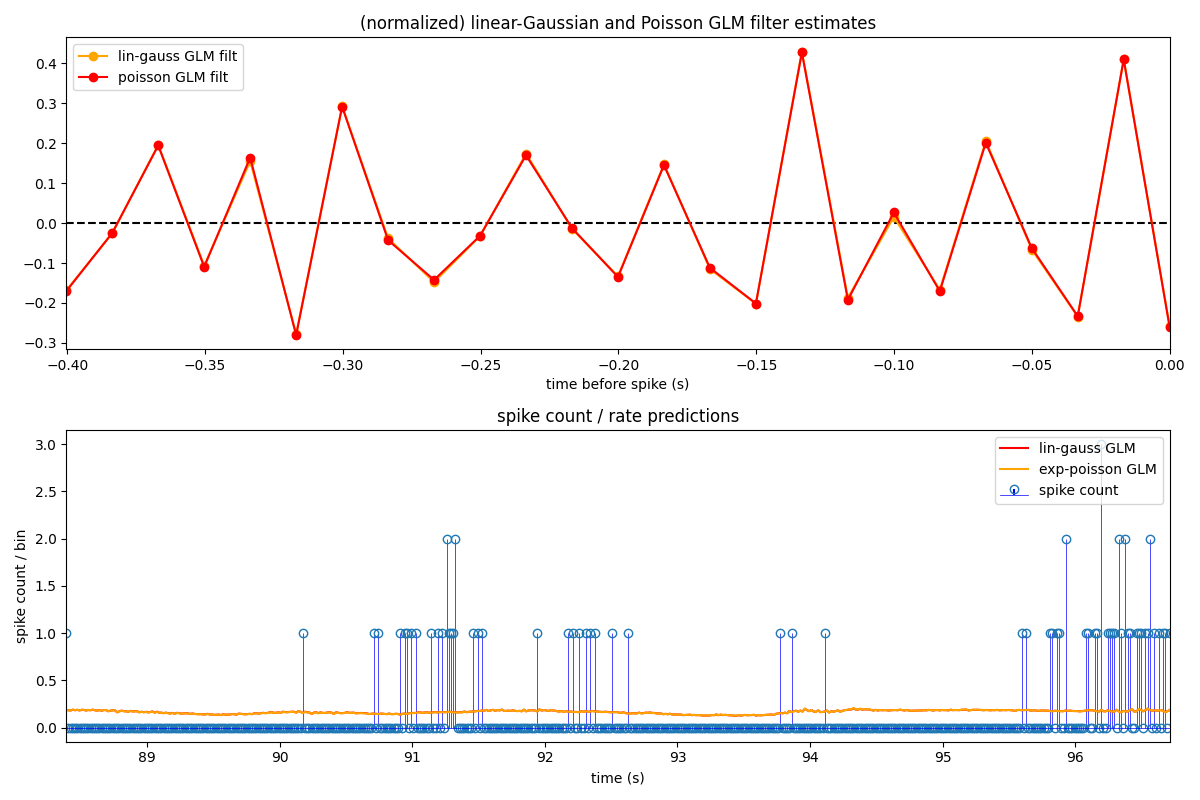

In [37]:
### ===== 5b. Make plots showing and spike rate predictions ======

plt.close()

fig, (ax1,ax2) = plt.subplots(2)
fig.set_size_inches(12,8)
ax1.plot(ttk,ttk*0, 'k--')
ax1.plot(ttk, wsta_offset/norm(wsta_offset), 'o-', label='lin-gauss GLM filt', c='orange')
ax1.plot(ttk, pGLM_filt/norm(pGLM_filt), 'o-', label='poisson GLM filt', c='r')
ax1.legend(loc = 'upper left')
ax1.set_title('(normalized) linear-Gaussian and Poisson GLM filter estimates')
ax1.set_xlabel('time before spike (s)')
ax1.set_xlim([ttk[0], ttk[-1]])

markerline,stemlines,baseline = plt.stem(ttplot,spikes_binned[iiplot], label="spike count", linefmt='b-', basefmt='b-')
plt.setp(markerline, 'markerfacecolor', 'none')
plt.setp(stemlines, color='b', linewidth=.5)
plt.setp(baseline, color='b', linewidth=.5)
ax2.plot(ttplot,sppred_lgGLM_offset[iiplot], label="lin-gauss GLM", c='r')
ax2.plot(ttplot,rate_pred_pGLM[iiplot], label="exp-poisson GLM", c='orange') 
ax2.set_title('spike count / rate predictions')
ax2.set_ylabel('spike count / bin'); plt.xlabel('time (s)')
ax2.set_xlim([ttplot[0], ttplot[-1]])
ax2.legend(loc='upper right')
plt.tight_layout()

# Note the rate prediction here is in units of spikes/bin. If we wanted
# spikes/sec, we could divide it by bin size dt_stim.

## Neuromatch GLM code

In [90]:
VIS_unit_ids=sessions[0].good_units.query('area.str.contains("VIS")').index.values
VIS_unit_ids

array([2208151120393, 2208151120395, 2208151120401, 2208151120404,
       2208151120405, 2208151120406, 2208151120407, 2208151120410,
       2208151120411, 2208151120413, 2208151120416, 2208151120418,
       2208151120419, 2208151120422, 2208151120428, 2208151120429,
       2208151120574, 2208151120425, 2208151120433, 2208151120436,
       2208151120438, 2208151120627, 2208151120431, 2208151120441,
       2208151120446, 2208151120611, 2208151120450, 2208151120453,
       2208151120457, 2208151120581, 2208151120458, 2208151120460,
       2208151120580, 2208151120463, 2208151120464, 2208151120468,
       2208151120470, 2208151120475, 2208151120612, 2208151120476,
       2208151120477, 2208151120587, 2208151120490, 2208151120492,
       2208151120494, 2208151120499, 2208151120501, 2208151120502,
       2208151120504, 2208151130304, 2208151130313], dtype=int64)

In [94]:
[x for x in sessions[0].spike_times[uid]]

SyntaxError: invalid syntax (2213867902.py, line 1)

In [55]:
# make all-session spike arrays - bin by frame

# start with one neuron
unit_id=2208151120401

frame_times=sessions[0].frames['vsyncTimes'].values
spike_times=sessions[0].spike_times[VIS_unit_ids]

spikes_binned, bin_edges = np.histogram(spike_times,bins=frame_times)

bin_centers=(bin_edges[:-1]+bin_edges[1:])/2


In [56]:
#make stimulus array

sel_stim='vis'

stim_array = np.zeros(len(bin_centers),dtype=int)

sel_trials = sessions[0].trials.query('trialStimID.str.contains(@sel_stim)')

for tt,trial in sel_trials.iterrows():
    stim_dur=int(trial['trial_stim_dur']*60)
    stim_start_frame=trial['trialStimStartFrame']
    stim_end_frame=trial['trialStimStartFrame']+stim_dur
    stim_array[stim_start_frame:stim_end_frame]=1

<IPython.core.display.Javascript object>


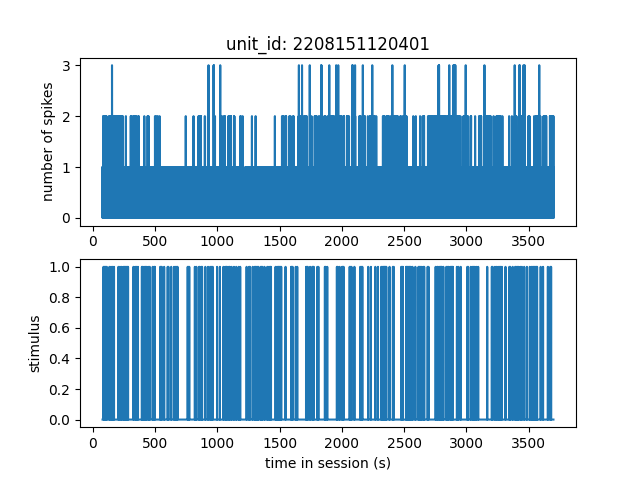

Text(0.5, 0, 'time in session (s)')

In [57]:
fig,ax=plt.subplots(2,1)
ax[0].plot(bin_centers,spikes_binned)
ax[0].set_ylabel('number of spikes')
ax[0].set_title('unit_id: '+str(unit_id))
# ax[1].plot(bin_centers,sessions[0].frames['runningSpeed'].values[1:])
# ax[1].set_ylabel('running speed (cm/sec)')
# ax[1].set_xlabel('time in session (s)')
ax[1].plot(bin_centers,stim_array)
ax[1].set_ylabel('stimulus')
ax[1].set_xlabel('time in session (s)')

In [58]:
running = sessions[0].frames['runningSpeed'].values[1:]

dt_frames = np.nanmedian(np.diff(frame_times)) # time bin size
refresh_rate = 1/dt_frames # refresh rate of the monitor
num_time_bins = running.size # number of time bins in stimulus
num_spikes = spike_times.size # number of spikes

In [84]:
def plot_stim_and_spikes(stim, spikes, dt, nt=120):
    """Show time series of stim intensity and spike counts.

    Args:
    stim (1D array): vector of stimulus intensities
    spikes (1D array): vector of spike counts
    dt (number): duration of each time step
    nt (number): number of time steps to plot

    """
    timepoints = np.arange(nt)
    time = timepoints * dt

    f, (ax_stim, ax_spikes) = plt.subplots(
    nrows=2, sharex=True, figsize=(8, 5),
    )
    ax_stim.plot(time, stim[timepoints])
    ax_stim.set_ylabel('Stimulus intensity')

    ax_spikes.plot(time, spikes[timepoints])
    ax_spikes.set_xlabel('Time (s)')
    ax_spikes.set_ylabel('Number of spikes')

    f.tight_layout()


def plot_glm_matrices(X, y, nt=50):
    """Show X and Y as heatmaps.

    Args:
    X (2D array): Design matrix.
    y (1D or 2D array): Target vector.

    """
    from matplotlib.colors import BoundaryNorm
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    Y = np.c_[y]  # Ensure Y is 2D and skinny

    f, (ax_x, ax_y) = plt.subplots(
    ncols=2,
    figsize=(6, 8),
    sharey=True,
    gridspec_kw=dict(width_ratios=(5, 1)),
    )
    norm = BoundaryNorm([-1, -.2, .2, 1], 256)
    imx = ax_x.pcolormesh(X[:nt], cmap="plasma")#, norm=norm)

    ax_x.set(
    title="X\n(lagged stimulus)",
    xlabel="Time lag (time bins)",
    xticks=[4, 14, 24],
    xticklabels=['-20', '-10', '0'],
    ylabel="Time point (time bins)",
    )
    plt.setp(ax_x.spines.values(), visible=True)

    divx = make_axes_locatable(ax_x)
    caxx = divx.append_axes("right", size="5%", pad=0.1)
    cbarx = f.colorbar(imx, cax=caxx)
#     cbarx.set_ticks([-.6, 0, .6])
#     cbarx.set_ticklabels(np.sort(np.unique(X)))

    norm = BoundaryNorm(np.arange(y.max() + 1), 256)
    imy = ax_y.pcolormesh(Y[:nt], cmap="magma", norm=norm)
    ax_y.set(
    title="Y\n(spike count)",
    xticks=[]
    )
    ax_y.invert_yaxis()
    plt.setp(ax_y.spines.values(), visible=True)

    divy = make_axes_locatable(ax_y)
    caxy = divy.append_axes("right", size="30%", pad=0.1)
    cbary = f.colorbar(imy, cax=caxy)
    cbary.set_ticks(np.arange(y.max()) + .5)
    cbary.set_ticklabels(np.arange(y.max()))


def plot_spike_filter(theta, dt, **kws):
    """Plot estimated weights based on time lag model.

    Args:
    theta (1D array): Filter weights, not including DC term.
    dt (number): Duration of each time bin.
    kws: Pass additional keyword arguments to plot()

    """
    d = len(theta)
    t = np.arange(-d + 1, 1) * dt

    ax = plt.gca()
    ax.plot(t, theta, marker="o", **kws)
    ax.axhline(0, color=".2", linestyle="--", zorder=1)
    ax.set(
    xlabel="Time before spike (s)",
    ylabel="Filter weight",
    )


def plot_spikes_with_prediction(
    spikes, predicted_spikes, dt, nt=50, t0=120, **kws):
    """Plot actual and predicted spike counts.

    Args:
    spikes (1D array): Vector of actual spike counts
    predicted_spikes (1D array): Vector of predicted spike counts
    dt (number): Duration of each time bin.
    nt (number): Number of time bins to plot
    t0 (number): Index of first time bin to plot.
    kws: Pass additional keyword arguments to plot()

    """
    t = np.arange(t0, t0 + nt) * dt

    f, ax = plt.subplots()
    lines = ax.stem(t, spikes[:nt], use_line_collection=True)
    plt.setp(lines, color=".5")
    lines[-1].set_zorder(1)
    kws.setdefault("linewidth", 3)
    yhat, = ax.plot(t, predicted_spikes[:nt], **kws)
    ax.set(
      xlabel="Time (s)",
      ylabel="Spikes",
    )
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.legend([lines[0], yhat], ["Spikes", "Predicted"])

    plt.show()

<IPython.core.display.Javascript object>


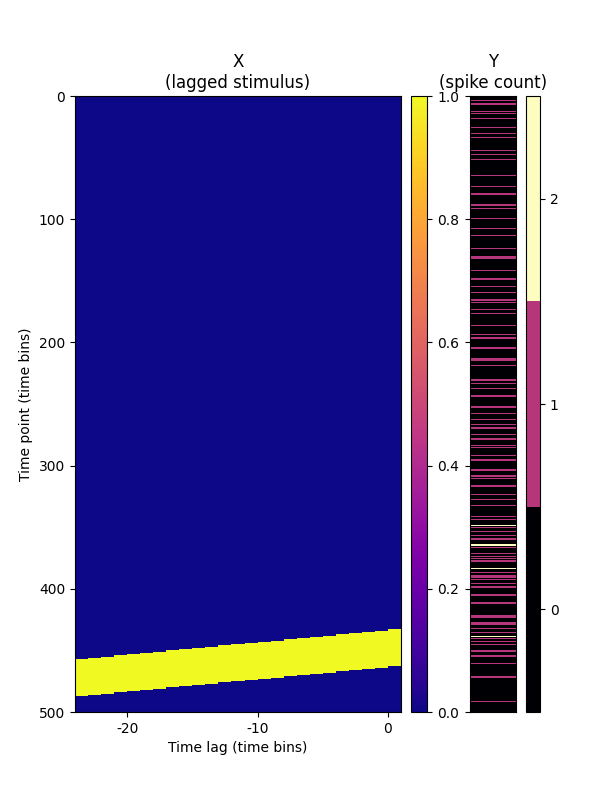

In [96]:
def make_design_matrix(stim, d=25):
    """Create time-lag design matrix from stimulus intensity vector.

      Args:
        stim (1D array): Stimulus intensity at each time point.
        d (number): Number of time lags to use.

      Returns
        X (2D array): GLM design matrix with shape T, d

    """
    # Create version of stimulus vector with zeros before onset
    padded_stim = np.concatenate([np.zeros(d - 1), stim])

    # Construct a matrix where each row has the d frames of
    # the stimulus preceding and including timepoint t
    T = len(stim)  # Total number of timepoints (hint: number of stimulus frames)
    X = np.zeros((T, d))
    for t in range(T):
        X[t] = padded_stim[t:t + d]

    return X


# Make design matrix
X = make_design_matrix(stim_array)

# Visualize
# with plt.xkcd():
plot_glm_matrices(X, spikes_binned, nt=500)

In [97]:
from scipy.optimize import minimize

def neg_log_lik_lnp(theta, X, y):
    """Return -loglike for the Poisson GLM model.

    Args:
    theta (1D array): Parameter vector.
    X (2D array): Full design matrix.
    y (1D array): Data values.

    Returns:
    number: Negative log likelihood.

    """
    # Compute the Poisson log likelihood
    rate = np.exp(X @ theta)
    log_lik = y @ np.log(rate) - rate.sum()
    return -log_lik


def fit_lnp(stim, spikes, d=25):
    """Obtain MLE parameters for the Poisson GLM.

    Args:
    stim (1D array): Stimulus values at each timepoint
    spikes (1D array): Spike counts measured at each timepoint
    d (number): Number of time lags to use.

    Returns:
    1D array: MLE parameters

    """

    # Build the design matrix
    y = spikes
    constant = np.ones_like(y)
    X = np.column_stack([constant, make_design_matrix(stim)])

    # Use a random vector of weights to start (mean 0, sd .2)
    x0 = np.random.normal(0, .2, d + 1)

    # Find parameters that minmize the negative log likelihood function
    res = minimize(neg_log_lik_lnp, x0, args=(X, y))

    return res["x"]


# Fit LNP model
theta_lnp = fit_lnp(stim_array, spikes_binned)

# # Visualize
# with plt.xkcd():
# #     plot_spike_filter(theta_lg[1:], dt_frames, color=".5", label="LG")
#     plot_spike_filter(theta_lnp[1:], dt_frames, label="LNP")
#     plt.legend(loc="upper left");

<IPython.core.display.Javascript object>


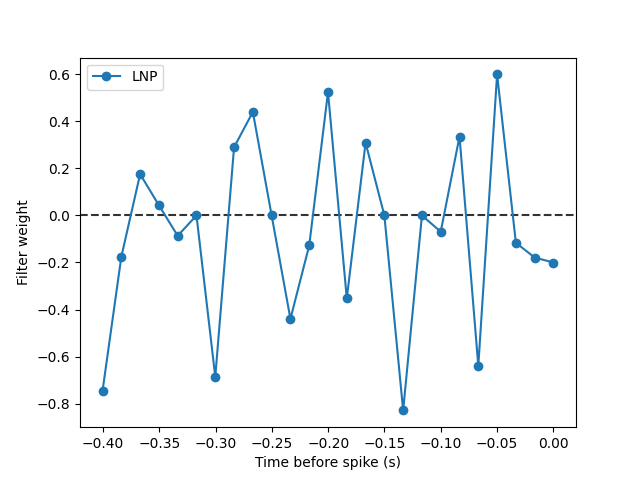

In [98]:
fig,ax=plt.subplots()
plot_spike_filter(theta_lnp[1:], dt_frames, label="LNP")
plt.legend(loc="upper left");

<IPython.core.display.Javascript object>


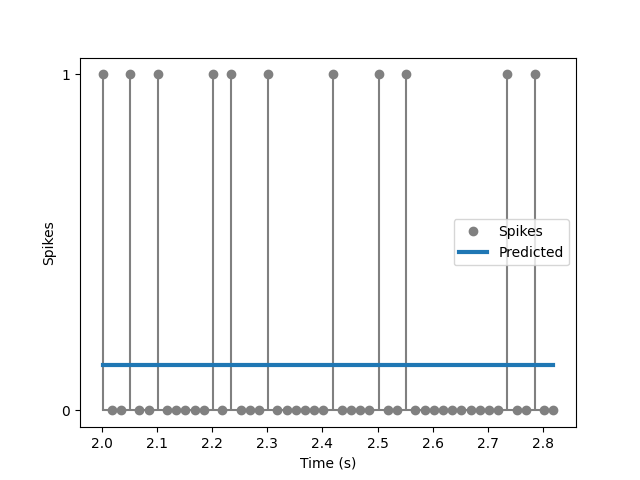

In [99]:
def predict_spike_counts_lnp(stim, spikes, theta=None, d=25):
    """Compute a vector of predicted spike counts given the stimulus.

    Args:
    stim (1D array): Stimulus values at each timepoint
    spikes (1D array): Spike counts measured at each timepoint
    theta (1D array): Filter weights; estimated if not provided.
    d (number): Number of time lags to use.

    Returns:
    yhat (1D array): Predicted spikes at each timepoint.

    """
    y = spikes
    constant = np.ones_like(spikes)
    X = np.column_stack([constant, make_design_matrix(stim)])
    if theta is None:  # Allow pre-cached weights, as fitting is slow
        theta = fit_lnp(X, y, d)

    yhat = np.exp(X @ theta)
    return yhat


# Predict spike counts
yhat = predict_spike_counts_lnp(stim_array, spikes_binned, theta_lnp)

# Visualize
# with plt.xkcd():
plot_spikes_with_prediction(spikes_binned, yhat, dt_frames)